# Onto2Vec

In this part of the tutorial, we run two ontology based methods to produce vector representations of biological entities: Onto2Vec and OPA2Vec.

## Imports

In [6]:
import sys
import os
sys.path.append('../../../')

#from mowl.datasets.ppi_yeast import PPIYeastSlimDataset, PPIYeastDataset
#from mowl.embeddings.onto2vec.model import Onto2Vec

#import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE
#import numpy as np

In [4]:
import mowl
mowl.init_jvm("2g")

OSError: JVM cannot be restarted

In [5]:
from mowl.datasets import PPIYeastDataset, PPIYeastSlimDataset
from mowl.reasoning.base import MOWLReasoner

from org.semanticweb.owlapi.apibinding import OWLManager
from org.semanticweb.elk.owlapi import ElkReasonerFactory
from org.semanticweb.HermiT import Reasoner

ImportError: Attempt to create Java package 'org' without jvm

In [4]:

ds = PPIYeastSlimDataset()

reasonerFactory = ElkReasonerFactory()
reasoner = reasonerFactory.createReasoner(ds.ontology)
reasoner.precomputeInferences()

consistent = reasoner.isConsistent()
print(f"consistent: {consistent}")

mreasoner = MOWLReasoner(reasoner)
mreasoner.infer_subclass_axioms(ds.ontology)
mreasoner.infer_equiv_class_axioms(ds.ontology)



Loading default configuration parameters for class org.semanticweb.elk.reasoner.config.ReasonerConfiguration
ELK reasoner was created
Loading of Axioms started
Loading of Axioms using 16 workers
[reasoner.indexing.axiomIgnored]ELK does not support InverseObjectProperties. Axiom ignored:
InverseObjectProperties(<http://purl.obolibrary.org/obo/BFO_0000050> <http://purl.obolibrary.org/obo/BFO_0000051>)
Loading of Axioms took 452 ms
Property Saturation Initialization started
Property Saturation Initialization using 16 workers
Property Saturation Initialization took 0 ms
Reflexive Property Computation started
Reflexive Property Computation using 16 workers
Reflexive Property Computation took 7 ms
Object Property Hierarchy and Composition Computation started
Object Property Hierarchy and Composition Computation using 16 workers
Object Property Hierarchy and Composition Computation took 5 ms
Context Initialization started
Context Initialization using 16 workers
Context Initialization took 1 m

INFO:root:Initial axioms: 262937. Final axioms: 273984. Added: 11047.
INFO:root:Initial axioms: 273984. Final axioms: 285005. Added: 11021.


## Onto2Vec

Onto2vec produces vectory representations based on the logical axioms of an ontology and the known associations between ontology classes and biological entities. In the case study below, we use Onto2vec to produce vector representations of proteins based on their GO annotations and the GO logical axioms.

In [5]:
from mowl.corpus.base import extract_axiom_corpus
extract_axiom_corpus(ds.ontology, "data/onto2vec_corpus")

INFO:root:Generating axioms corpus


In [6]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
sentences = LineSentence("data/onto2vec_corpus")

model = Word2Vec(
         sentences,
         sg = 1,
         min_count = 1,
         vector_size = 20,
         window = 5,
         epochs = 20,
         workers = 4
     )

vectors = model.wv


INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 48805 words, keeping 3943 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000, processed 97625 words, keeping 5413 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #30000, processed 146270 words, keeping 6352 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #40000, processed 195345 words, keeping 6878 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #50000, processed 244160 words, keeping 7394 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #60000, processed 292970 words, keeping 7778 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #70000, processed 341732 words, keeping 8129 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #80000, processed 390615 words, keeping 8470 word 

INFO:gensim.models.word2vec:EPOCH - 5 : training on 1300188 raw words (595275 effective words) took 1.1s, 546869 effective words/s
INFO:gensim.models.word2vec:EPOCH 6 - PROGRESS: at 84.57% examples, 503108 words/s, in_qsize 3, out_qsize 1
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 6 : training on 1300188 raw words (595577 effective words) took 1.1s, 528761 effective words/s
INFO:gensim.models.word2vec:EPOCH 7 - PROGRESS: at 90.61% examples, 541594 words/s, in_qsize 0, out_qsize 0
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:g

INFO:gensim.models.word2vec:EPOCH 20 - PROGRESS: at 89.10% examples, 531808 words/s, in_qsize 8, out_qsize 0
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 20 : training on 1300188 raw words (595169 effective words) took 1.1s, 565767 effective words/s
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'training on 26003760 raw words (11906589 effective words) took 21.8s, 545762 effective words/s', 'datetime': '2022-05-07T23:56:04.577455', 'gensim': '4.1.2', 'python': '3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:11) \n[GCC 9.4.0]', 'platform': 'Linux-5.4.0-109-generic-x86_64-with-glibc2.27', 'event': 'train'}
INFO:gensim.utils:Word2Vec lifecyc

# Evaluation

In [7]:
from mowl.projection.edge import Edge
from mowl.projection.factory import projector_factory

eval_projector = projector_factory('taxonomy_rels', taxonomy=False, relations=["http://interacts_with"])

training_set = eval_projector.project(ds.ontology)
testing_set = eval_projector.project(ds.testing)

training_entities,_ = Edge.getEntitiesAndRelations(training_set)
testing_entities,_ = Edge.getEntitiesAndRelations(testing_set)

entities = list(set(training_entities) | set(testing_entities))


INFO: Number of ontology classes: 11021
INFO: Number of ontology classes: 3610


In [8]:
from mowl.evaluation.base import RankBasedEvaluator, CosineSimilarity

evaluator = RankBasedEvaluator(
        vectors, 
        testing_set, 
        CosineSimilarity, 
        training_set = training_set, 
        head_entities=entities,
        tail_entities=entities)

evaluator.evaluate(show=True)

INFO:root:Entity http://4932.YNL150W not present in the embeddings dictionary. Ignoring it.
INFO:root:Entity http://4932.YNL150W not present in the embeddings dictionary. Ignoring it.


Training labels created

Hits@1:   0.00 Filtered:   0.01
Hits@10:  0.05 Filtered:   0.10
Hits@100: 0.49 Filtered:   0.57
MR:       379.37 Filtered: 347.56
AUC:      0.94 Filtered:   0.94
Evaluation finished. Access the results using the "metrics" attribute.


# TSNE

In [10]:
ec_numbers = {}
with open('data/yeast_ec.tab') as f:
    next(f)
    for line in f:
        it = line.strip().split('\t', -1)
        if len(it) < 5:
            continue
        if it[3]:
            prot_id = it[3].split(';')[0]
            prot_id = '{0}'.format(prot_id)
            ec_numbers[f"http://{prot_id}"] = it[4].split(".")[0]

In [11]:
from mowl.visualization.base import TSNE as MTSNE

tsne = MTSNE(vectors, ec_numbers, entities = entities)
tsne.generate_points(5000, workers = 16, verbose = 1)

INFO:root:There are 4262 entities with no label. Processing only 1694 out of 5956 entities.
/home/zhapacfp/anaconda3/envs/mowldev/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/zhapacfp/anaconda3/envs/mowldev/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1693 samples in 0.000s...
[t-SNE] Computed neighbors for 1693 samples in 0.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1693
[t-SNE] Computed conditional probabilities for sample 1693 / 1693
[t-SNE] Mean sigma: 0.619370
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.208847
[t-SNE] KL divergence after 5000 iterations: 0.956491


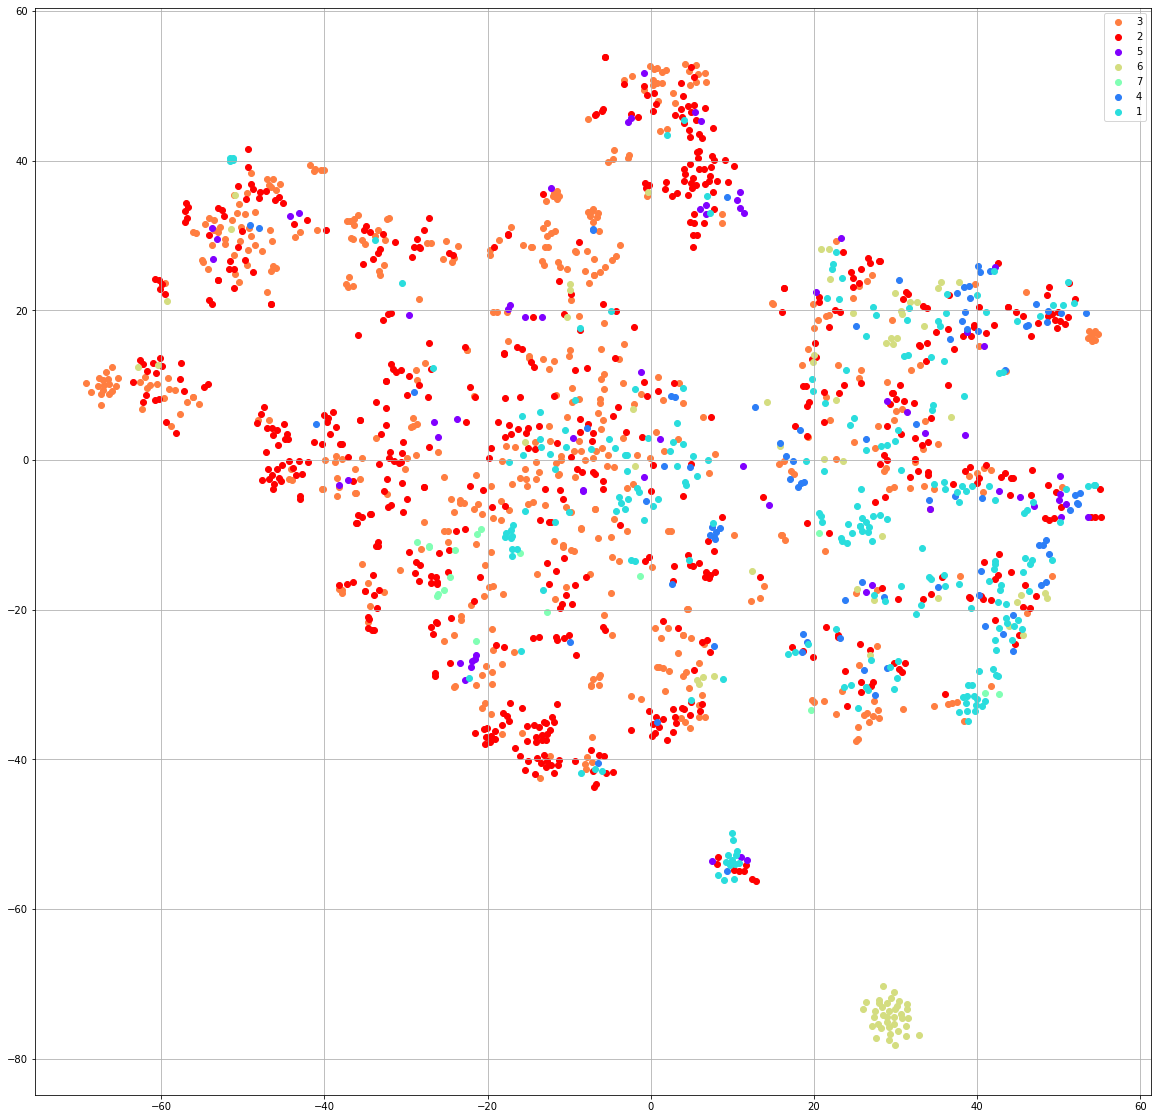

In [12]:
tsne.show()